In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
df_begin=pd.read_csv('D:\\KULIAH\\teep\AI\\dataset\\52 cells\\CellReports.csv')
df_begin

,timestamp,Viavi.Cell.Name,DRB.UEThpDl,DRB.UEThpUl,RRU.PrbUsedDl,RRU.PrbUsedUl,RRU.PrbAvailDl,RRU.PrbAvailUl,RRU.PrbTotUl,RRU.PrbTotDl,RRU.MaxLayerDlMimo,CARR.AverageLayersDl,RRC.ConnMean,RRC.ConnMax,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower,PEE.Energy
0,1672502400,S1/B2/C1,0.278192,0.278192,81.459016,81.459016,100,100,81.459016,81.459016,0.0,0.0,1.786885,2.311475,277.868853,277.868853,281.947679,0.004195
1,1672502400,S7/B2/C1,0.146310,0.146310,50.000000,50.000000,100,100,50.000000,50.000000,0.0,0.0,0.516667,1.316667,146.050000,146.050000,180.817352,0.002292
2,1672502400,S8/B2/C1,0.220303,0.220303,64.300000,64.300000,100,100,64.300000,64.300000,0.0,0.0,1.450000,3.966667,220.083333,220.083333,230.893458,0.004631
3,1672502400,S9/B2/C1,0.186428,0.186428,80.900000,80.900000,100,100,80.900000,80.900000,0.0,0.0,1.916667,6.900000,186.083333,186.083333,279.584476,0.005326
4,1672502400,S1/B13/C1,0.000000,0.000000,0.000000,0.000000,75,75,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,18.250000,0.000360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524206,1673107140,S3/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,4.000000,0.000000,0.000000,21.000000,11.000064
524207,1673107140,S3/N77/C3,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,2.000000,0.000000,0.000000,21.000000,7.609575
524208,1673107140,S4/N77/C1,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,3.000000,0.000000,0.000000,21.000000,7.789410
524209,1673107140,S4/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,5.000000,0.000000,0.000000,21.000000,18.617635


In [3]:
df_1=df_begin.copy()
convert_time=pd.to_datetime(df_1['timestamp'], unit='s',origin='unix')
df_1.insert(df_1.columns.get_loc('timestamp') + 1, 'datetime_column', convert_time)
df_1.set_index('datetime_column', inplace=True)
df_1.drop(columns=['timestamp'], inplace=True)

In [4]:
# Filter for specific columns and their correlations
corr_matrix = df_1.corr(numeric_only=True)[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']]
display(corr_matrix)
filtered_corr = corr_matrix[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']]

# Find columns where correlation with 'RRU.PrbUsedDl' or 'RRU.PrbUsedUl' is greater than 0.5
columns_with_high_corr = filtered_corr.index[(filtered_corr['RRU.PrbUsedDl'] > 0.5) & (filtered_corr['RRU.PrbUsedUl'] > 0.5)].tolist()

print("higher correlation > 0.5:\n", columns_with_high_corr)

,RRU.PrbUsedDl,RRU.PrbUsedUl
DRB.UEThpDl,0.609351,0.655949
DRB.UEThpUl,0.551258,0.604384
RRU.PrbUsedDl,1.000000,0.976418
RRU.PrbUsedUl,0.976418,1.000000
RRU.PrbAvailDl,0.153882,0.084899
RRU.PrbAvailUl,0.153882,0.084899
RRU.PrbTotUl,0.763879,0.816766
RRU.PrbTotDl,0.789155,0.825822
RRU.MaxLayerDlMimo,0.564125,0.475535
CARR.AverageLayersDl,0.564125,0.475535


higher correlation > 0.5:
 ['DRB.UEThpDl', 'DRB.UEThpUl', 'RRU.PrbUsedDl', 'RRU.PrbUsedUl', 'RRU.PrbTotUl', 'RRU.PrbTotDl', 'RRC.ConnMean', 'QosFlow.TotPdcpPduVolumeUl', 'QosFlow.TotPdcpPduVolumeDl', 'PEE.AvgPower']


In [5]:
seleted_columns = columns_with_high_corr
df_1= df_1[seleted_columns].copy()
df_1

,DRB.UEThpDl,DRB.UEThpUl,RRU.PrbUsedDl,RRU.PrbUsedUl,RRU.PrbTotUl,RRU.PrbTotDl,RRC.ConnMean,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower
datetime_column,,,,,,,,,,
2022-12-31 16:00:00,0.278192,0.278192,81.459016,81.459016,81.459016,81.459016,1.786885,277.868853,277.868853,281.947679
2022-12-31 16:00:00,0.146310,0.146310,50.000000,50.000000,50.000000,50.000000,0.516667,146.050000,146.050000,180.817352
2022-12-31 16:00:00,0.220303,0.220303,64.300000,64.300000,64.300000,64.300000,1.450000,220.083333,220.083333,230.893458
2022-12-31 16:00:00,0.186428,0.186428,80.900000,80.900000,80.900000,80.900000,1.916667,186.083333,186.083333,279.584476
2022-12-31 16:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
...,...,...,...,...,...,...,...,...,...,...
2023-01-07 15:59:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
2023-01-07 15:59:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
2023-01-07 15:59:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000


In [6]:
try:
    df_2= df_1.resample('T').mean().drop(columns=['Viavi.Cell.Name'])
except:
    df_2= df_1.resample('T').mean()
df=df_2.astype(float).copy()
df

,DRB.UEThpDl,DRB.UEThpUl,RRU.PrbUsedDl,RRU.PrbUsedUl,RRU.PrbTotUl,RRU.PrbTotDl,RRC.ConnMean,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower
datetime_column,,,,,,,,,,
2022-12-31 16:00:00,0.112853,0.109073,41.647609,40.984468,46.001455,46.243443,0.923145,108.877027,112.657593,163.482931
2022-12-31 16:01:00,0.100812,0.096750,42.121474,41.068910,42.468269,42.851923,0.923397,96.565170,100.627194,153.417886
2022-12-31 16:02:00,0.106379,0.102369,41.851282,40.958333,44.454808,44.781090,0.921795,102.151550,106.161736,158.808699
2022-12-31 16:03:00,0.100694,0.098010,42.577885,41.491026,43.767308,44.164103,0.922115,97.808665,100.492253,157.386986
2022-12-31 16:04:00,0.109902,0.107143,43.626603,42.665705,46.993269,47.343910,0.921795,106.939023,109.697512,167.089184
...,...,...,...,...,...,...,...,...,...,...
2023-01-07 15:55:00,0.110139,0.107350,42.102244,41.227244,46.298077,46.618590,0.922115,107.129670,109.918532,164.456731
2023-01-07 15:56:00,0.099864,0.098178,40.426282,39.726282,44.533654,44.790064,0.923077,97.959150,99.644908,159.064446
2023-01-07 15:57:00,0.114258,0.110941,40.190705,40.190705,45.145833,45.145833,0.923077,110.729551,114.046510,161.020629


In [7]:
n = len(df)
train_df =df[0:int(n*0.9048)]
val_df = df[int(n*0.9048):]
test_df = df[int(n*0.9048):]

num_features = df.shape[1]

In [8]:
column_output=['RRU.PrbUsedDl', 'RRU.PrbUsedUl']
train_df[column_output].mean()

RRU.PrbUsedDl    43.265388
RRU.PrbUsedUl    42.034358
dtype: float64

In [9]:
train_df

,DRB.UEThpDl,DRB.UEThpUl,RRU.PrbUsedDl,RRU.PrbUsedUl,RRU.PrbTotUl,RRU.PrbTotDl,RRC.ConnMean,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower
datetime_column,,,,,,,,,,
2022-12-31 16:00:00,0.112853,0.109073,41.647609,40.984468,46.001455,46.243443,0.923145,108.877027,112.657593,163.482931
2022-12-31 16:01:00,0.100812,0.096750,42.121474,41.068910,42.468269,42.851923,0.923397,96.565170,100.627194,153.417886
2022-12-31 16:02:00,0.106379,0.102369,41.851282,40.958333,44.454808,44.781090,0.921795,102.151550,106.161736,158.808699
2022-12-31 16:03:00,0.100694,0.098010,42.577885,41.491026,43.767308,44.164103,0.922115,97.808665,100.492253,157.386986
2022-12-31 16:04:00,0.109902,0.107143,43.626603,42.665705,46.993269,47.343910,0.921795,106.939023,109.697512,167.089184
...,...,...,...,...,...,...,...,...,...,...
2023-01-06 23:55:00,0.092405,0.090435,36.615064,35.745833,41.075000,41.392949,0.920833,90.250244,92.220245,148.714320
2023-01-06 23:56:00,0.115662,0.112113,38.994551,37.724038,43.453205,43.917628,0.923397,111.900025,115.449578,158.002132
2023-01-06 23:57:00,0.105134,0.100982,44.094551,41.540064,43.188141,44.121795,0.920833,100.783346,104.935294,156.023048


In [10]:
import numpy as np
import pandas as pd

def standardize_data(data, isoutput=True, column_output=['RRU.PrbUsedDl', 'RRU.PrbUsedUl'], train_df=train_df):
    if isoutput:
        mean = train_df[column_output].mean().values
        std = train_df[column_output].std().values
    else:
        mean = train_df.mean().values
        std = train_df.std().values

    # Reshape for broadcasting with 2D matrix
    mean = mean.reshape(1, -1)
    std = std.reshape(1, -1)

    return (data - mean) / std

def inverse_standardize_data(data, isoutput=True, column_output=['RRU.PrbUsedDl', 'RRU.PrbUsedUl'], train_df=train_df):
    if isoutput:
        mean = train_df[column_output].mean().values
        std = train_df[column_output].std().values
    else:
        mean = train_df.mean().values
        std = train_df.std().values

    # Reshape for broadcasting with 2D matrix
    mean = mean.reshape(1, -1)
    std = std.reshape(1, -1)

    return (data * std) + mean


In [11]:
train_scaled = standardize_data(train_df, isoutput=False)
val_scaled= standardize_data(val_df, isoutput=False)
test_scaled= standardize_data(test_df, isoutput=False)

In [12]:
# Parameter windowing
input_width = 60*2
label_width = 60
shift = label_width
total_window_size = input_width + shift
OUT_STEPS = label_width
# Definisikan irisan untuk input dan label
input_slice = slice(0, input_width)
label_start = total_window_size - label_width
labels_slice = slice(label_start, None)

def make_windows(data_x,data_y, total_window_size, input_slice, labels_slice):
    x = []
    y = []
    for i in range(len(data_x) - total_window_size + 1):
        window_x = data_x[i:i+total_window_size]
        x.append(window_x[input_slice])

    for i in range(len(data_y) - total_window_size + 1):
        window_y= data_y[i:i+total_window_size]
        y.append(window_y[labels_slice])

    return np.array(x), np.array(y)

# Membuat windowed dataset untuk set pelatihan, validasi, dan pengujian

x_train_scaled, y_train_scaled = make_windows(train_scaled.to_numpy(), train_scaled[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']].to_numpy(),total_window_size, input_slice, labels_slice)
x_val_scaled, y_val_scaled = make_windows(val_scaled.to_numpy(), val_scaled[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']].to_numpy(),total_window_size, input_slice, labels_slice)
x_test_scaled, y_test_scaled = make_windows(test_scaled.to_numpy(),test_scaled[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']].to_numpy(), total_window_size, input_slice, labels_slice)

# Verifikasi bentuk windowed dataset
print("x_train_scaled shape:", x_train_scaled.shape)
print("y_train_scaled shape:", y_train_scaled.shape)
print("x_val_scaled shape:", x_val_scaled.shape)
print("y_val_scaled shape:", y_val_scaled.shape)
print("x_test_scaled shape:", x_test_scaled.shape)
print("y_test_scaled shape:", y_test_scaled.shape)


x_train_scaled shape: (8941, 120, 10)
y_train_scaled shape: (8941, 60, 2)
x_val_scaled shape: (781, 120, 10)
y_val_scaled shape: (781, 60, 2)
x_test_scaled shape: (781, 120, 10)
y_test_scaled shape: (781, 60, 2)


In [13]:
input_width = x_train_scaled.shape[1]
num_features = x_train_scaled.shape[2]

OUT_STEPS = y_train_scaled.shape[1]
num_output = y_train_scaled.shape[2]
MAX_EPOCHS = 5

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  model.fit(window[0],window[1], epochs=MAX_EPOCHS,
                      callbacks=[early_stopping])
  return model

num_output = y_train_scaled.shape[2]
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(input_width, num_features)),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_output,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_output])
])

train_scaled_final=(x_train_scaled, y_train_scaled)
#history = compile_and_fit(multi_lstm_model, train_scaled_final)


In [14]:
import datetime

# Get the current date and time
now = datetime.datetime.now()

# Format the date and time to a string
timestamp = now.strftime("%Y%m%d_%H%M")
print(timestamp)
nama_file='8a_%s.hdf5'%timestamp
#history.save(filepath=nama_file)

20240719_1741


In [15]:
import tensorflow as tf

# Step 1: Load the model
multi_lstm_model = tf.keras.models.load_model('8a_20240719_1455.hdf5')

multi_lstm_model
multi_lstm_model


In [16]:
inputs=x_train_scaled
model=multi_lstm_model
predictions = model.predict(inputs[-1, :, :].reshape(1, -1, num_features))
predictions.shape

1/1 [==============================] - 2s 2s/step


(1, 60, 2)

In [17]:
y_train_scaled.shape

(8941, 60, 2)

In [18]:
def plot_timeseries(inputs=x_train_scaled, labels=y_train_scaled,  model=None,input_width=input_width, out_steps=OUT_STEPS, num_features=num_features, num_output=num_output):
    if np.array_equal(inputs, x_train_scaled):
        print("data training")
        input_indices = train_df[-input_width-OUT_STEPS:-OUT_STEPS].index
        label_indices = train_df[-OUT_STEPS:].index

    elif np.array_equal(inputs, x_val_scaled):
        print("data validation")
        input_indices = val_df[-input_width-OUT_STEPS:-OUT_STEPS].index
        label_indices = val_df[-OUT_STEPS:].index
    elif np.array_equal(inputs, x_test_scaled):
        print("data test")
        input_indices = test_df[-input_width-OUT_STEPS:-OUT_STEPS].index
        label_indices = test_df[-OUT_STEPS:].index

    predictions = model.predict(inputs[-1, :, :].reshape(1, -1, num_features))
    predictions = inverse_standardize_data(predictions.reshape(-1, num_output), isoutput=True)
    predictions = predictions.reshape(1, -1, num_output)
    labels_shape= labels.shape
    labels = inverse_standardize_data(labels.reshape(-1,num_output), isoutput=True)
    labels = labels.reshape(labels_shape)

    inputs_shape= inputs.shape
    inputs = inputs.reshape(-1, num_features)
    inputs = inverse_standardize_data(inputs, isoutput=False)
    inputs = inputs.reshape(inputs_shape)
 

    num_output=labels.shape[2]
    name_features= df.columns.to_numpy()
    plt.figure(figsize=(16, 8))
    for n in range(num_output):
        # print(name_features[n])
        # Create a subplot for each input example up to max_n
        plt.subplot(num_output, 1, n+1)
        # Set the label for the y-axis
        plt.ylabel(f'{name_features[n+2]}')
        # Plot the input data for the selected column
        plt.plot(input_indices, inputs[-1, :, n+2],
                        label='Inputs', marker='.', zorder=-10)
        if labels is not None:
                plt.scatter(label_indices, labels[-1, :, n],
                            edgecolors='k', label='Labels', c='#2ca02c', s=32)
        if model is not None:
                plt.scatter(label_indices, predictions[-1, :, n],
                            marker='X', edgecolors='k', label='Predictions',
                            c='#ff7f0e', s=32)
        plt.legend()
                
    plt.subplots_adjust(hspace=0.2, top=1)
    plt.show()


data training
1/1 [==============================] - 0s 25ms/step


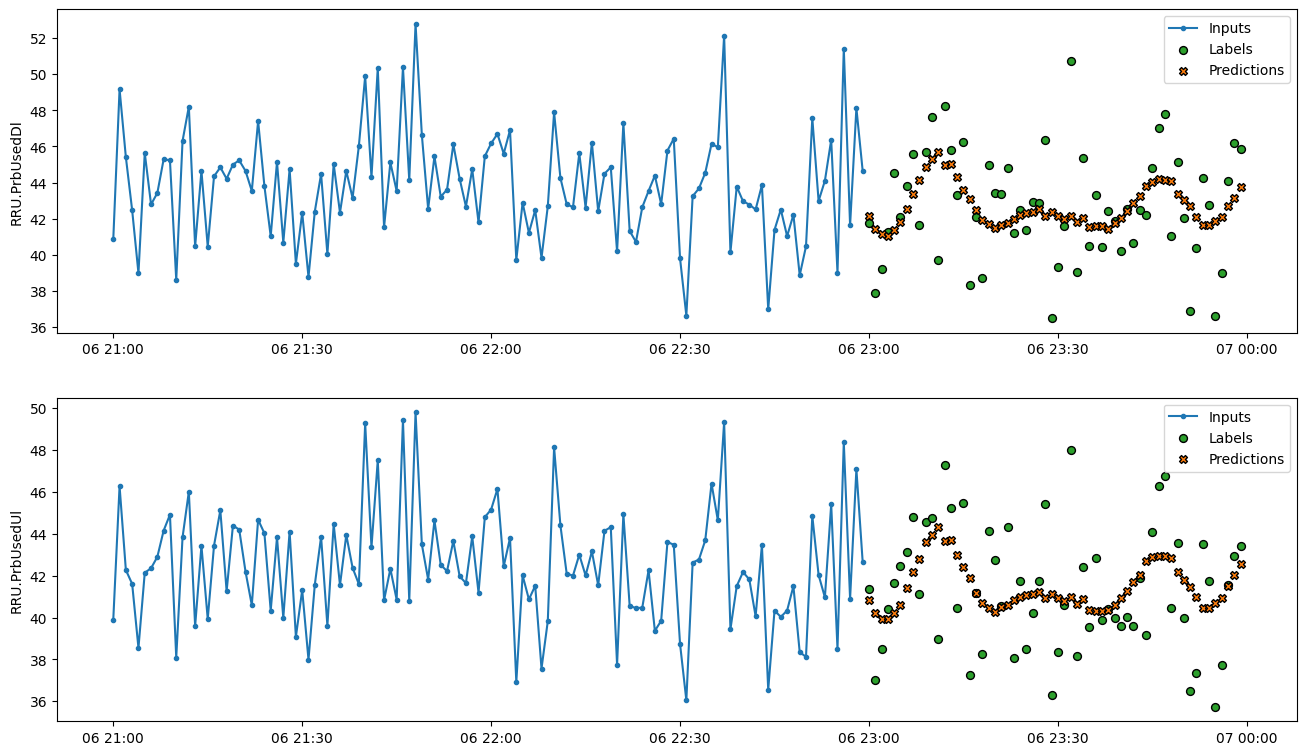

In [19]:
plot_timeseries(inputs=x_train_scaled, labels=y_train_scaled,  model=multi_lstm_model)

data validation
1/1 [==============================] - 0s 27ms/step


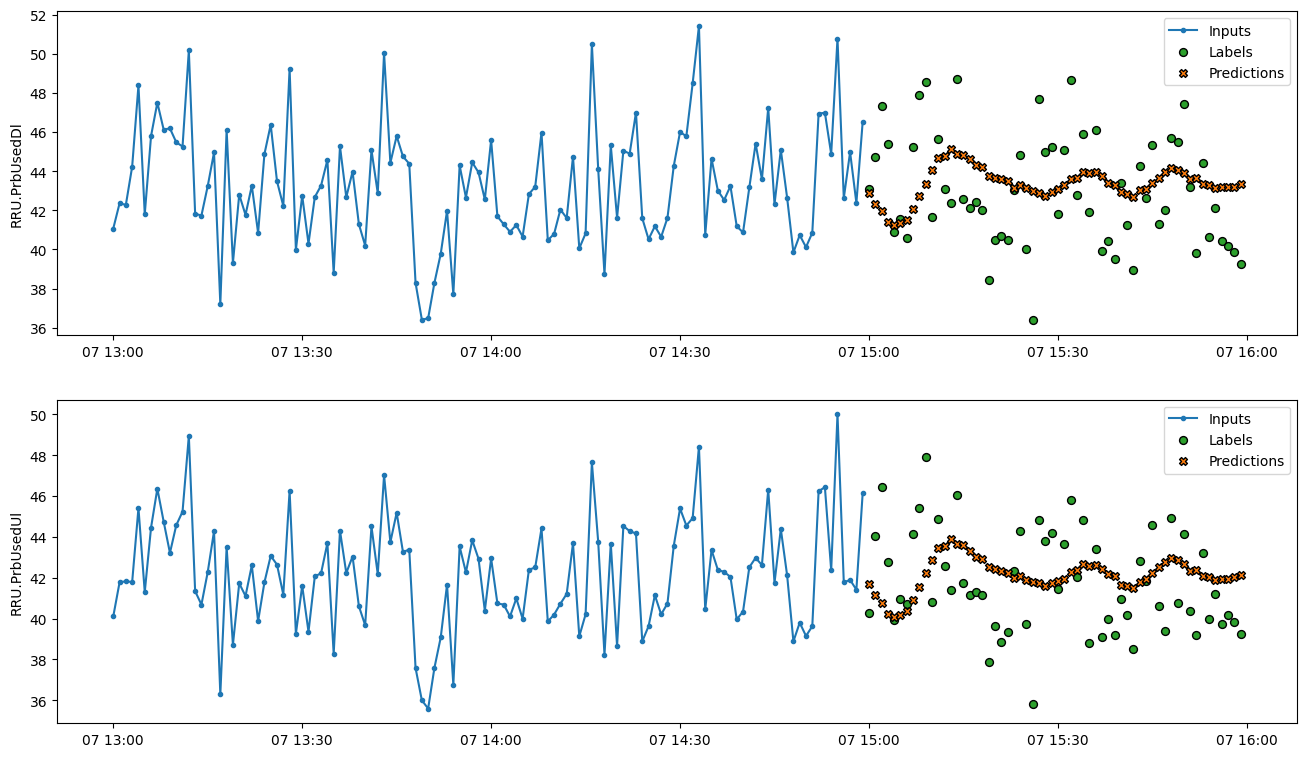

In [20]:
plot_timeseries(inputs=x_val_scaled[:,:,:], labels=y_val_scaled[:,:,:],  model=multi_lstm_model)